# Chapter 5: Simulation-ODE-DAE

In this chapter, we will explore the simulation of dynamic systems in the form of Ordinary Differential Equations (ODEs) and Differential-Algebraic Equations (DAEs). We will cover various numerical methods for solving these equations, discuss their properties, and provide examples of their implementation.

## 1. Ordinary Differential Equations (ODE)

Ordinary Differential Equations (ODEs) are equations that involve functions of one independent variable and their derivatives. They are widely used to model dynamic systems in engineering, physics, biology, and other fields. Numerical methods are often employed to solve ODEs when analytical solutions are not feasible. In our standard nomenclature, we express ODEs in the form:

$$\frac{d\mathbf{y}}{dt}(t) = \mathbf{f}(\mathbf{y}(t), t, \mathbf{p})$$

where $\mathbf{y}(t)$ is the state vector, $\frac{d\mathbf{y}}{dt}(t)$ denotes the time derivative, $\mathbf{f}$ is the vector-valued function defining the dynamics, $t$ is time, and $\mathbf{p}$ represents parameters.

We will explore several numerical methods for solving ODEs, starting with basic first-order methods to build intuitive and principles and progressing to more advanced techniques.

### 1.1 First order methods
First order methods are the simplest numerical techniques for solving ODEs. They approximate the solution by taking small steps in time and updating the state of the system based on the derivative at the current point. While these methods are easy to implement, they may require very small time steps to achieve accurate results, especially for stiff equations. However, they provide a good starting point for understanding numerical integration.

In particular, the Euler integrator is an excellent starting point for many reasons which are not limited to pedagogical development. Because it is very simple to implement, it is a great tool for testing and debugging more complex simulation code. Additionally, its simplicity allows for easy analysis of numerical errors and stability properties, which are fundamental concepts in numerical methods for ODEs.

#### 1.1.1 Forward Euler
The forward Euler method, also known as explicit Euler, is a first-order explicit integration scheme. It approximates the derivative using a forward difference and updates the state accordingly. We can derive the formulat forward Euler from the definition of a forward difference approximation of the equation $\frac{d\mathbf{y}}{dt}(t) = \mathbf{f}(\mathbf{y}(t), t, \mathbf{p})$

$$\frac{d\mathbf{y}}{dt}(t) \approx \frac{\mathbf{y}_{n+1} -  \mathbf{y}_n}{ \Delta t}  = \mathbf{f}(\mathbf{y}(t), t, \mathbf{p}),$$

so,

$$\mathbf{y}_{n+1} = \mathbf{y}_n + \Delta t \cdot \mathbf{f}(\mathbf{y}(t), t, \mathbf{p}),$$

Where $\mathbf{y}_0 (t=0)$ is the precisely known starting condition and  $\mathbf{y}_{n+1}$ is approximation of the dynamic varibles $\mathbf{y}$ at a time $t +\Delta t$, i.e.  $\mathbf{y}_{n+1} \approx \mathbf{y}(t +\Delta t)$. The formal definition is given below for reference:

> **Definition:** Given an ODE $\frac{d\mathbf{y}}{dt}(t) = \mathbf{f}(\mathbf{y}(t), t, \mathbf{p})$ with initial condition $\mathbf{y}(t_0) = \mathbf{y}_0$, the forward Euler method discretizes time into steps of size $h$ and computes the solution at $t_{n+1} = t_n + \Delta t$ as:
>
> $$\mathbf{y}_{n+1} = \mathbf{y}_n + \Delta t \cdot \mathbf{f}(\mathbf{y}_n, t_n, \mathbf{p})$$
>
> where $\mathbf{y}_n$ approximates $\mathbf{y}(t_n)$.


How to build such a solver in python is best demonstrated with a simple example below. It should be noted that the core loop is only two lines of code, demonstrating the simplicity of the method:
```python
for t in timespan:  # Loop over the time span of the simulation
    y = y + dydt(t, y) * dt  # Step forward in time for 1 time step
```

That is to say, at every time step, we simply evaluate the derivative at the current time and state, multiply it by the time step size, and add it to the current state to get the new state. If you understand this loop, you understand the forward Euler method and the basis for many other more advanced methods as well.

> ##### Example: Forward Euler Method
> Solving the ODE $\frac{dy}{dt} = -2y + 1$ with initial condition \(y(0) = 0\) using the forward Euler method.


In [1]:
import numpy as np

# Define initial conditions and parameters
y = 0.0  # The y0 initial condition

# Define the ODE as a function
def dydt(t, y):
    return -2 * y + 1

# Time span for the simulation
timespan = np.linspace(0, 5, 100)
dt = timespan[1] - timespan[0] # Time step size

# data storage
y_values = []
t_values = []
y_values.append(y)
t_values.append(timespan[0])


# Forward Euler integration loop:
for t in timespan:
    # Step forward in time for 1 time step
    y = y + dydt(t, y) * dt

    # Store results
    y_values.append(y)
    t_values.append(t)

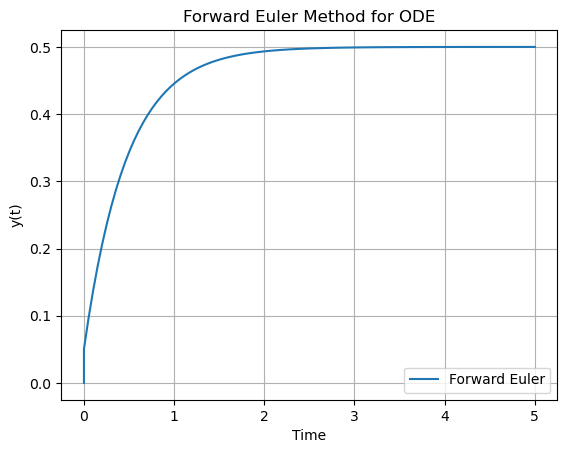

In [2]:
# Plot the results
import matplotlib.pyplot as plt
def plot_dydt_sol(t_values, y_values, label='Forward Euler', title='Forward Euler Method for ODE', xlabel='Time', ylabel='y(t)'):
    plt.plot(t_values, y_values, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_dydt_sol(t_values, y_values)

Another common way to write an Euler loop is with a while condition, then there is no need to generate a time space. This is often used in more advanced integration methods with an adaptive time step:

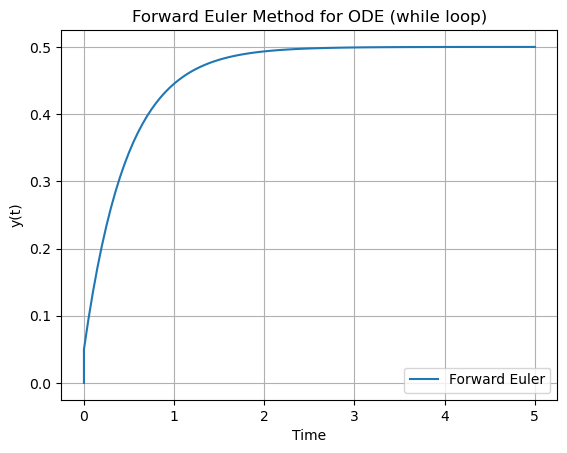

In [3]:
import numpy as np

# Define initial conditions and parameters
y = 0.0  # The y0 initial condition
t = 0  # Starting time
t_f = 5  # Final time of simulation from t=0 to t=5
dt = t_f/100

# Define the ODE as a function
def dydt(t, y):
    return -2 * y + 1

# data storage
y_values = []
t_values = []
y_values.append(y)
t_values.append(timespan[0])

# Forward Euler integration loop:
while t < t_f:
    # Step forward in time for 1 time step
    y = y + dydt(t, y) * dt

    # Store results
    y_values.append(y)
    t_values.append(t)

    # Increment the time:
    t += dt

# Plot solution:
plot_dydt_sol(t_values, y_values, title='Forward Euler Method for ODE (while loop)')

This method is straightforward but can be unstable for large step sizes or stiff systems.


#### 1.1.2 Implicit Euler

The implicit Euler method, also known as backward Euler, is a first-order implicit integration scheme. It uses the derivative at the future time step for the update, requiring the solution of an equation at each step.

> **Definition:** For the ODE $\frac{d\mathbf{y}}{dt}(t) = \mathbf{f}(\mathbf{y}(t), t, \mathbf{p})$, the **implicit Euler method** approximates at $t_{n+1} = t_n + h$:
>
> $$\mathbf{y}_{n+1} = \mathbf{y}_n + h \cdot \mathbf{f}(\mathbf{y}_{n+1}, t_{n+1}, \mathbf{p})$$
>
> This forms an algebraic equation solved for $\mathbf{y}_{n+1}$.

Where $\mathbf{y}_{n+1}$ is often using methods like Gauss-Newton's iteration which we learned about in the Chapter 4.

Implicit methods offer better stability for stiff systems compared to explicit ones, though they increase computational cost per step due to the need for solving nonlinear equations. The code below demonstrates the implicit Euler method applied to the same ODE as before, $\frac{dy}{dt} = -2y + 1$ with initial condition \(y(0) = 0\).


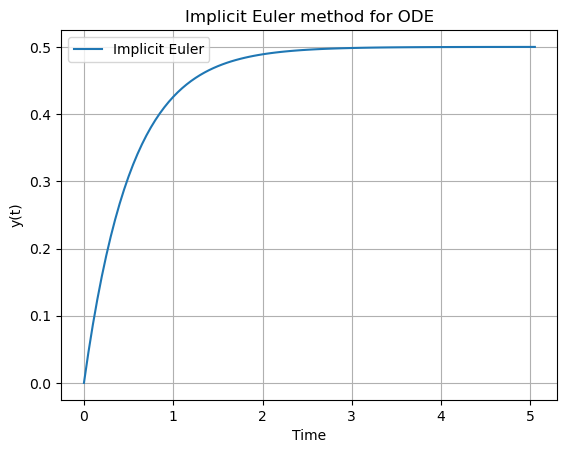

In [4]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define initial conditions and parameters
y = 0.0  # Initial condition y(0) = 1
t = 0.0  # Starting time
t_f = 5.0  # Final time
dt = t_f / 100  # Step size

# Define the ODE as a function: dy/dt = -2 * y + 1 (for simplicity; analytical solution y = exp(-t))
def dydt(t, y):
    return -2 * y + 1

# Data storage
y_values = [y]
t_values = [t]

# Implicit Euler integration loop:
while t < t_f:
    t_next = t + dt
    # Define residual for implicit equation: res(y_next) = y_next - y - dt * dydt(t_next, y_next)
    def res(y_next):
        return y_next - y - dt * dydt(t_next, y_next)

    # Solve for y_next using fsolve (initial guess: current y)
    y_next = fsolve(res, y)[0]

    # Update y and store results
    y = y_next
    y_values.append(y)
    t_values.append(t_next)

    # Increment time
    t = t_next

# Plot solution
plot_dydt_sol(t_values, y_values, label='Implicit Euler', title='Implicit Euler method for ODE')

### 1.2 The initial value problem (IVP) and independent variables other than time:

It is important to note that while in this course we focus on time as the dynamic variable for simulation, integrators of ODE systems of course work identically for any independent variable. We can now develop a formal definition for the initial value problem (IVP) in the context of our course:

> **Definition**: An **initial value problem (IVP)** for an ODE system is defined as finding the state vector $\mathbf{y}(s)$ that satisfies:
>
> $$\frac{d\mathbf{y}}{ds}(s) = \mathbf{f}(\mathbf{y}(s), s, \mathbf{p}),$$
>
> with initial condition $\mathbf{y}(s_0) = \mathbf{y}_0$, where $s$ is the independent variable (e.g., time $t$ or position $x$), $\mathbf{y}(s)$ is the state vector, $\mathbf{f}$ is the vector-valued right-hand side function, $s_0$ is the starting value of the independent variable, $\mathbf{y}_0$ is the initial state, and $\mathbf{p}$ are parameters. The solution is sought over an interval $s \in [s_0, s_f]$.

This formulation generalizes beyond time-dependent dynamics to any scenario where the system's evolution is governed by first-order derivatives with respect to a single independent variable. Numerical solvers approximate $\mathbf{y}(s)$ by stepping forward from $s_0$, using methods like those discussed earlier (e.g., Euler or Runge-Kutta). This can be illustrated with a simple example given below:

> #### (Optional) Example:
> Consider the deflection of a cantilever beam under uniform distributed load $q$, modeled using the Euler-Bernoulli beam theory. The system is recast as a first-order ODE in terms of position $x$ (the independent variable):
Let $\mathbf{y} = [y_1, y_2, y_3, y_4]^\top$, where:
>
> $y_1 = v(x)$: deflection,
> $y_2 = \theta(x) = \frac{dv}{dx}$: slope,
> $y_3 = M(x)$: bending moment,
> $y_4 = V(x)$: shear force.
>
> The ODE system is:
>
>  $$\frac{d\mathbf{y}}{dx} =
\begin{bmatrix}
y_2 \\
\frac{y_3}{EI} \\
y_4 \\
-q
\end{bmatrix},$$
>
> with initial conditions at the fixed end ($x=0$): $\mathbf{y}(0) = [0, 0, 0, 0]^\top$ (zero deflection, slope, moment, and shear for simplicity in this unloaded-at-end case; adjust for point loads if needed). Here, $E$ is Young's modulus, $I$ is the moment of inertia, and parameters $\mathbf{p} = [E, I, q, L]$, where $L$ is the beam length.


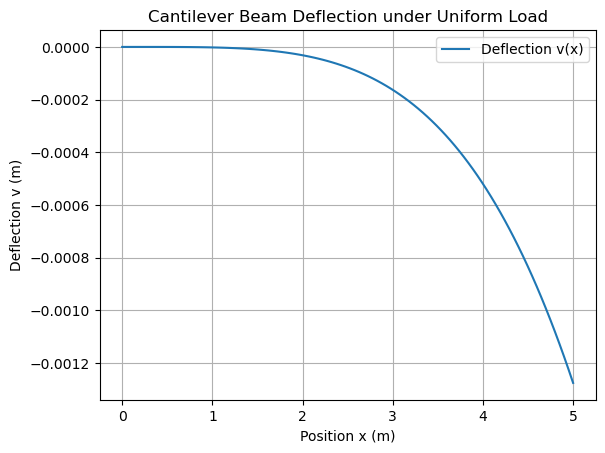

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters (example values: steel beam, uniform load)
E = 200e9  # Young's modulus (Pa)
I = 1e-4   # Moment of inertia (m^4)
q = 1000   # Uniform load (N/m)
L = 5.0    # Beam length (m)


# Evaluate solution at discrete points for plotting
xspan = np.linspace(0, L, 100)
dx = xspan[1] - xspan[0]  # Step size

# Define the ODE right-hand side
def dydx(x, y, E, I, q): # x replaces t as independent variable
    return np.array([ y[1],            # dy1/dx = y2
                      y[2] / (E * I),  # dy2/dx = y3 / (E I)
                      y[3],            # dy3/dx = y4
                      -q               # dy4/dx = -q
                    ])

# Initial conditions at x=0 (fixed end)
y0 = [0.0, 0.0, 0.0, 0.0]
y = np.array(y0)

# data storage
y_values = []
x_values = []
y_values.append(y[0])
x_values.append(xspan[0])

# Forward Euler integration loop:
for x in xspan:
    # Step forward in time for 1 time step
    y = y + dydx(x, y, E, I, q) * dx

    # Store results
    y_values.append(y[0])
    x_values.append(x)

# NOTE: To solve the IVP from x=0 to x=L using scipy's solve_ivp with extra args:
#sol = solve_ivp(beam_ode, [0, L], y0, args=(E, I, q), method='RK45', dense_output=True)

# Plot deflection v(x) = y1
plot_dydt_sol(x_values, y_values, label='Deflection v(x)', title='Cantilever Beam Deflection under Uniform Load', xlabel='Position x (m)', ylabel='Deflection v (m)')


### (Optional) 1.3 Integrators vs. integration

Another important distinction is the difference between integrators -which are used to solve initial value problems- and integration routines -which compute integrals of functions whose values are already known throughout the entire domain of the integration. Formally:

> **Defintion**: An **integrator** is a numerical method or algorithm designed to solve an initial value problem (IVP) for an ODE or DAE system by approximating the evolution of the state vector $\mathbf{y}(s)$ from an initial condition $\mathbf{y}(s_0) = \mathbf{y}_0$ over the interval $s \in [s_0, s_f]$, where $s$ is the independent variable. It computes $\mathbf{y}(s)$ step-by-step using evaluations of $\mathbf{f}(\mathbf{y}, s, \mathbf{p})$, without requiring prior knowledge of $\mathbf{y}$ across the entire domain.

> **Definition**: An **integration routine**, often called a quadrature method, computes the definite integral $\int_{a}^{b} g(s) \, ds$ of a known scalar or vector function $g(s)$ over the interval $\Omega = [a, b]$, where values of $g(s)$ can be evaluated at any point in the domain. Unlike integrators, it assumes $g(s)$ is fully accessible and does not solve for unknown states evolving via derivatives.

This distinction is crucial: integrators "move forward" to discover unknown solutions to differential equations, while integration routines sum up areas under known curves. Confusing them can lead to inefficient or incorrect implementations, especially in engineering simulations where both may appear (e.g., integrating forces over time in dynamics).

> #### Example: Integration Routine
> For a simple example of an integration routine, consider computing $\int_{0}^{5} e^{-s} \, ds = 1 - e^{-5}$ where $g(s) = e^{-s}$ is known everywhere, using `scipy.integrate.quad`:

In [6]:
from scipy.integrate import quad

def g(s):
    return np.exp(-s)

integral, error = quad(g, 0, 5)
print(f"Integral: {integral}, Estimated error: {error}")

Integral: 0.9932620530009145, Estimated error: 1.102742400728068e-14


### 1.4 Stiffness

Stiffness in ODEs refers to systems where some components evolve much faster than others, leading to numerical challenges.

> **Definition:** An ODE system is **stiff** if the solution involves widely varying time scales, such that the ratio of the largest to smallest eigenvalue of the Jacobian $\frac{\partial \mathbf{f}}{\partial \mathbf{y}}$ is large in magnitude, requiring implicit methods for efficient stable integration with reasonable step sizes.

Stiff systems arise in chemical kinetics, electrical circuits, and spacecraft dynamics, where explicit methods may demand impractically small steps to maintain stability, while implicit methods allow larger steps by damping fast transients. Detecting stiffness often involves analyzing the eigenvalues of the Jacobian matrix of the system or observing numerical instability in explicit methods as demonstrated in the example below.

> #### Example: Stiff system
> A simple example of a stiff ODE is the scalar test equation $\frac{dy}{dt} = -50 y$, with initial condition $y(0) = 1$. The analytical solution is $y(t) = e^{-50 t}$, which decays rapidly to zero. This system is stiff because the eigenvalue of the Jacobian ($\frac{\partial f}{\partial y} = -50$) has a large negative magnitude, indicating a fast time scale.
> For forward Euler, the method becomes unstable if the step size $h$ is too large. Specifically, stability requires $h < 0.04$ (derived from the condition $|1 - 50 h| < 1$). If $h = 0.05 > 0.04$, the numerical solution oscillates and diverges, failing to capture the smooth decay.
> Here is a Python example demonstrating this failure with forward Euler for $h = 0.05$, compared to a stable run with $h = 0.03$. We also include the analytical solution for reference.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define parameters
y0 = 1.0  # Initial condition
t0 = 0.0  # Start time
t_f = 0.5  # End time (short to show initial transient)

# Analytical solution
t_anal = np.linspace(t0, t_f, 100)
y_anal = np.exp(-50 * t_anal)

# Function for dy/dt = -50 y
def dydt(t, y):
    return -50 * y

def euler_plot(dt):
    t = t0
    y = y0
    t_values = [t]
    y_values = [y]
    while t < t_f:
        y = y + dydt(t, y) * dt
        t += dt
        t_values.append(t)
        y_values.append(y)

    plt.figure(figsize=(8, 5))
    plt.plot(t_values, y_values, label=f'Forward Euler (h={dt:.3f})')
    plt.plot(t_anal, y_anal, 'k--', label='Analytical')
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.title('Forward Euler for Stiff ODE')
    plt.legend()
    plt.grid()
    plt.ylim(-2, 2)  # To show oscillations clearly
    plt.show()

interact(euler_plot, dt=FloatSlider(min=0.01, max=0.06, step=0.001, value=0.05));

interactive(children=(FloatSlider(value=0.05, description='dt', max=0.06, min=0.01, step=0.001), Output()), _d…

In the unstable case ($dt=0.05$), the solution oscillates wildly and grows in magnitude, completely failing. In the stable case ($dt=0.03$), it approximates the decay, though with some error due to the first-order accuracy. Implicit Euler handles this stiff system robustly even for large $dt$ (e.g., $dt=0.1$), as its stability region includes the entire left half-plane.
> #### Example: Basic Stability Analysis
> Stability analysis for numerical ODE methods often uses the linear test equation $\frac{dy}{dt} = \lambda y$, where $\lambda$ is a complex number (typically with negative real part for decaying solutions). The exact solution is $y(t) = y_0 e^{\lambda t}$, which is stable if $\Re(\lambda) < 0$.
For a numerical method, apply it to this test equation and find the amplification factor $R(h \lambda)$, where the numerical solution is $y_{n+1} = R(h \lambda) y_n$. The method is absolutely stable if $|R(h \lambda)| \leq 1$.
>
> Forward Euler: $R(z) = 1 + z$, where $z = h \lambda$. Stability requires $|1 + z| \leq 1$, which for real $\lambda < 0$ gives $h < -2 / \lambda$.
> Implicit Euler: $R(z) = 1 / (1 - z)$. For real $\lambda < 0$ ($z < 0$), $|R(z)| < 1$ for any $h > 0$, making it unconditionally stable.
>
> To demonstrate, consider $\lambda = -50$. For forward Euler, the stability boundary is $h < 0.04$. We can plot the amplification factor magnitude for varying $dt$:

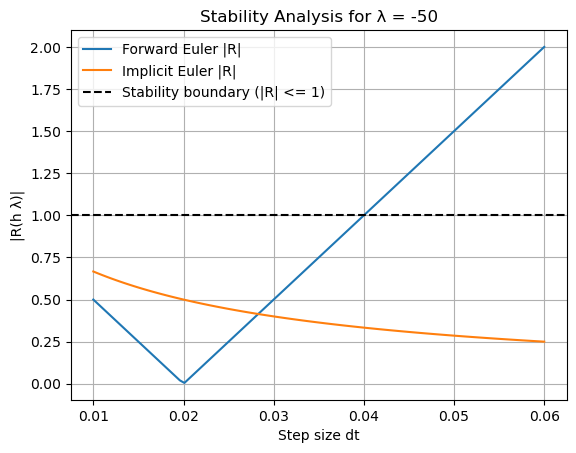

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Test equation parameters
lambda_val = -50.0
dt_values = np.linspace(0.01, 0.06, 100)

# Amplification factors
R_forward = np.abs(1 + dt_values * lambda_val)
R_implicit = np.abs(1 / (1 - dt_values * lambda_val))

# Plot
plt.plot(dt_values, R_forward, label='Forward Euler |R|')
plt.plot(dt_values, R_implicit, label='Implicit Euler |R|')
plt.axhline(1, color='k', linestyle='--', label='Stability boundary (|R| <= 1)')
plt.xlabel('Step size dt')
plt.ylabel('|R(h λ)|')
plt.title('Stability Analysis for λ = -50')
plt.legend()
plt.grid()
plt.show()


### 1.5 Advanced solvers
Advanced solvers build on basic methods to achieve higher accuracy, better efficiency, or adaptive behavior. They often combine multiple evaluations of $\mathbf{f}$ per step or adjust step sizes dynamically.

#### 1.5.1 Runge-Kutta
Runge-Kutta (RK) methods are a family of explicit or implicit integrators that improve accuracy by evaluating the right-hand side function $\mathbf{f}$ at intermediate points within each time step.

> **Definition:** A general s-stage Runge-Kutta method for $\frac{d\mathbf{y}}{dt} = \mathbf{f}(\mathbf{y}, t, \mathbf{p})$ computes stages $\mathbf{k}_i = \mathbf{f}(\mathbf{y}_n + h \sum_{j=1}^{s} a_{ij} \mathbf{k}_j, t_n + h c_i, \mathbf{p})$ and updates $\mathbf{y}_{n+1} = \mathbf{y}_n + h \sum_{i=1}^{s} b_i \mathbf{k}_i$, where coefficients $a_{ij}$, $b_i$, $c_i$ define the Butcher tableau.

Popular examples include the classical fourth-order RK4 for non-stiff problems, offering order-4 accuracy with four evaluations per step, and implicit RK methods like Radau for stiff systems.

> #### Example: RK4 Method
> Runge-Kutta (continued)
> Consider the classical fourth-order Runge-Kutta (RK4) method applied to the simple ODE $\frac{dy}{dt} = -y$ with $y(0) = 1$, over $t \in [0, 5]$. The analytical solution is $y(t) = e^{-t}$. This explicit method uses four stages per step for higher accuracy compared to Euler.
Here is a basic Python implementation using a loop, similar to the earlier Euler examples





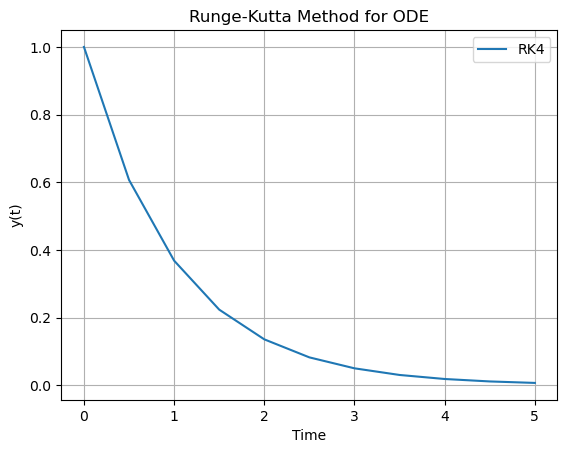

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial conditions and parameters
y = 1.0  # Initial condition y(0) = 1
t = 0.0  # Starting time
t_f = 5.0  # Final time
dt = 0.5  # Step size (larger than Euler for demonstration)

# Define the ODE as a function: dy/dt = -y
def dydt(t, y):
    return -y

# Data storage
y_values = [y]
t_values = [t]

# RK4 integration loop
while t < t_f:
    k1 = dydt(t, y)
    k2 = dydt(t + dt/2, y + dt/2 * k1)
    k3 = dydt(t + dt/2, y + dt/2 * k2)
    k4 = dydt(t + dt, y + dt * k3)

    # Update y
    y += dt/6 * (k1 + 2*k2 + 2*k3 + k4)

    # Increment time and store
    t += dt
    y_values.append(y)
    t_values.append(t)

# Plot solution
plot_dydt_sol(t_values, y_values, title='Runge-Kutta Method for ODE', label='RK4')

#### 1.5.2 Adaptive Step Size Methods

Advanced solvers often incorporate adaptive step sizing to automatically adjust the time step $h$ during integration, ensuring a balance between accuracy and computational efficiency. This is particularly useful for systems where the dynamics change over time—e.g., fast transients requiring small $h$ and slow periods allowing larger $h$.

> **Definition:** An *adaptive step size* method dynamically modifies the integration step \(h\) based on local error estimates. Typically, it computes two approximations at each step (e.g., using different orders or step halvings), compares them to estimate the truncation error, and adjusts \(h\) to keep the error within user-specified tolerances (e.g., relative tolerance `rtol` and absolute tolerance `atol`). If the error is too large, \(h\) is reduced (e.g., halved); if too small, \(h\) is increased (e.g., doubled) for efficiency.

Adaptive methods reduce the risk of instability or excessive computation in explicit solvers and enable larger steps in implicit ones for stiff problems. Common implementations use embedded Runge-Kutta pairs (e.g., RK45, which computes both 4th- and 5th-order solutions from shared stages) or predictor-corrector schemes.
For a minimalist example, consider a basic adaptive forward Euler method with step doubling for error estimation applied to the ODE $\frac{dy}{dt} = -y$ with $y(0) = 1$, over $t \in [0, 5]$. We estimate the error by comparing a full step to two half-steps and adjust $h$ accordingly, targeting an error tolerance of $10^{-3}$.


An example loop is shown below. This loop dynamically adjusts $h$, using fewer steps in smooth regions. For comparison, overlay the analytical solution $y(t) = e^{-t}$ by adding t_anal = np.linspace(0, t_f, 100); y_anal = np.exp(-t_anal); plt.plot(t_anal, y_anal, 'k--', label='Analytical'); plt.legend(). In practice, libraries like scipy.integrate.solve_ivp provide robust adaptive methods (e.g., method='RK45') with built-in error control.

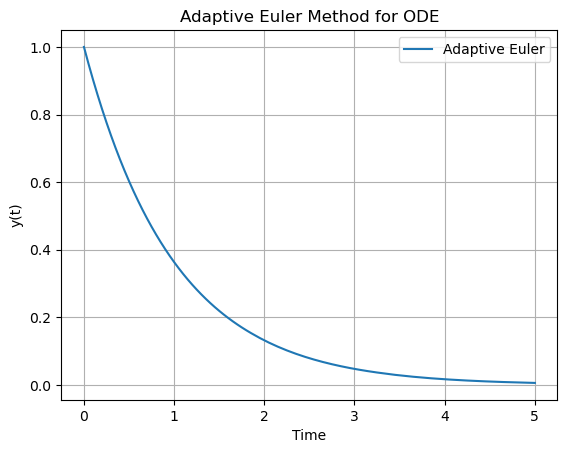

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dydt_sol(t_values, y_values, label='Solution'):
    plt.plot(t_values, y_values, label=label)
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.title('Adaptive Euler Method for ODE')
    plt.legend()
    plt.grid()
    plt.show()

# Define initial conditions and parameters
y = 1.0  # Initial condition y(0) = 1
t = 0.0  # Starting time
t_f = 5.0  # Final time
h = 0.1  # Initial step size
tol = 1e-3  # Error tolerance

# Define the ODE: dy/dt = -y
def dydt(t, y):
    return -y

# Data storage
y_values = [y]
t_values = [t]

# Adaptive Euler loop
while t < t_f:
    # Take one full step
    y_full = y + h * dydt(t, y)

    # Take two half-steps
    y_half1 = y + (h/2) * dydt(t, y)
    y_half2 = y_half1 + (h/2) * dydt(t + h/2, y_half1)

    # Estimate error
    error = abs(y_half2 - y_full)

    # Adjust step size
    if error > tol:
        h /= 2  # Reduce if error too large
    elif error < tol / 10:
        h *= 2  # Increase if error much smaller
    else:
        # Accept step (use more accurate two-half-step result)
        y = y_half2
        t += h
        y_values.append(y)
        t_values.append(t)

    # Prevent h from becoming too small or exceeding remaining time
    h = min(h, t_f - t)
    h = max(h, 1e-6)

# Plot solution
plot_dydt_sol(t_values, y_values, label='Adaptive Euler')

#### 1.5.3 LSODA

LSODA (Livermore Solver for Ordinary Differential Equations, with Automatic method switching for stiff and nonstiff problems) is a hybrid solver that dynamically switches between non-stiff (Adams-Bashforth-Moulton) and stiff (Backward Differentiation Formula) methods.

It is implemented in libraries like scipy.integrate.solve_ivp with method='LSODA', automatically detecting stiffness via Jacobian analysis and adapting the integration order and method. This makes it versatile for problems where stiffness may vary over the integration interval, such as in orbital mechanics with perturbations.

For a minimalist example, consider solving the stiff ODE $\frac{dy}{dt} = -50 y$ with $y(0) = 1$, over $t \in [0, 0.5]$. The analytical solution is $y(t) = e^{-50 t}$. LSODA handles the stiffness efficiently without requiring small fixed steps.

Here is a basic Python implementation using scipy.integrate.solve_ivp:




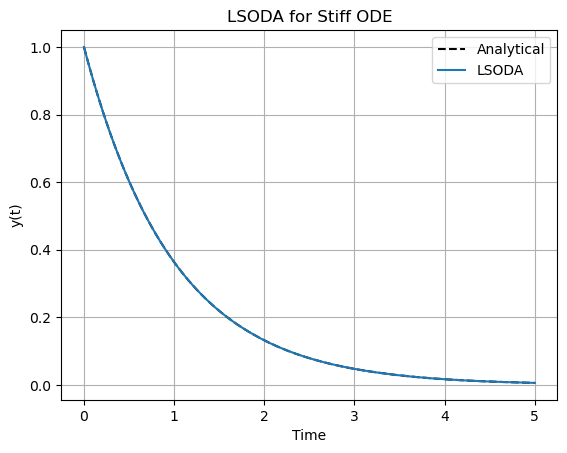

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE: dy/dt = -50 y
def dydt(t, y):
    return -50 * y

# Solve with LSODA
sol = solve_ivp(dydt, [0, 0.5], [1], method='LSODA', rtol=1e-6, atol=1e-6)

# Analytical solution for comparison
t_anal = np.linspace(0, 0.5, 100)
y_anal = np.exp(-50 * t_anal)

# Plot
plt.plot(t_values, y_values, 'k--', label='Analytical')
plt.plot(t_values, y_values, label='LSODA')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('LSODA for Stiff ODE')
plt.legend()
plt.grid()
plt.show()

### (Optional) 1.6 Special topic: Symplectic integrators

Symplectic integrators are specialized numerical methods designed for Hamiltonian systems, where the dynamics preserve energy and other invariants over long simulations. They are particularly useful in space engineering for orbital mechanics, where standard integrators like Runge-Kutta may introduce artificial energy drift, leading to inaccurate long-term trajectories.

> **Definition:** A **symplectic integrator** is a numerical scheme that preserves the symplectic form of the phase space in Hamiltonian ODEs,$\frac{d\mathbf{q}}{dt} = \frac{\partial H}{\partial \mathbf{p}}$, $\frac{d\mathbf{p}}{dt} = -\frac{\partial H}{\partial \mathbf{q}}$, where $H(\mathbf{q}, \mathbf{p})$ is the Hamiltonian, $\mathbf{q}$ are positions, and $\mathbf{p}$ are momenta. This ensures bounded energy errors and qualitative correctness in conservative systems, unlike non-symplectic methods where errors grow linearly.

Common examples include the Verlet (leapfrog) method for second-order systems and higher-order symplectic Runge-Kutta methods. They excel in N-body problems or molecular dynamics but may not handle non-conservative forces directly. In space engineering, symplectic integrators are invaluable for long-term simulations of orbital dynamics, such as satellite trajectories or planetary orbits, where preserving energy and angular momentum prevents artificial dissipation or growth that could invalidate mission predictions. For instance, in the two-body problem (e.g., a satellite orbiting Earth), non-symplectic methods like standard Runge-Kutta may cause orbits to spiral inward or outward over many periods due to numerical energy drift.

> #### Example: Verlet Integrator for Orbital Mechanics
> Consider the restricted two-body problem in 2D for simplicity: a satellite with position $(x, y)$ and velocity $(v_x, v_y)$, governed by $\ddot{\mathbf{r}} = -\frac{\mu}{r^3} \mathbf{r}$, where $\mathbf{r} = (x, y)$, $r = \|\mathbf{r}\|$, and $\mu$ is the gravitational parameter (e.g., Earth's $\mu \approx 3.986 \times 10^{14}$ m³/s²). This is a Hamiltonian system, with positions $\mathbf{q} = (x, y)$ and momenta $\mathbf{p} = (v_x, v_y)$ (assuming unit mass).
We can apply the Verlet (leapfrog) integrator to simulate a circular orbit. Initial conditions: $x(0) = r_0$, $y(0) = 0$, $v_x(0) = 0$, $v_y(0) = \sqrt{\mu / r_0}$, where $r_0$ is the orbital radius (e.g., Low Earth Orbit at 6371 km + 400 km altitude).

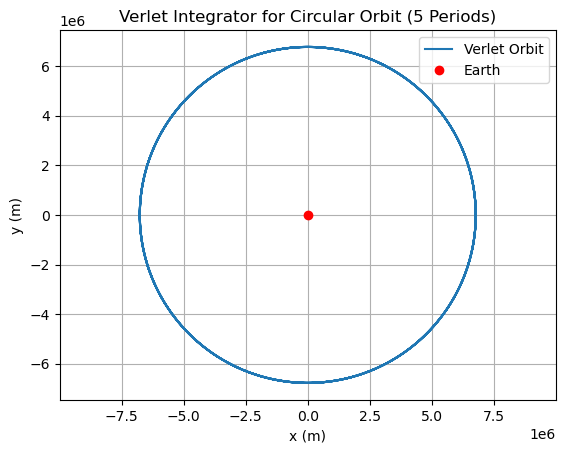

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters (Earth's mu, LEO radius)
mu = 3.986e14  # m^3/s^2
r0 = 6371000 + 400000  # m (Earth radius + 400 km altitude)
v0 = np.sqrt(mu / r0)  # Circular orbit speed

# Initial conditions
q = np.array([r0, 0.0])  # Position (x, y)
p = np.array([0.0, v0])  # Momentum (vx, vy) for unit mass
t = 0.0  # Starting time
t_f = 2 * np.pi * np.sqrt(r0**3 / mu) * 5  # 5 orbital periods
dt = 10.0  # Step size (s); small for accuracy

# Data storage
q_values = [q.copy()]
t_values = [t]

# Force function: d^2 q / dt^2 = -mu / r^3 * q
def force(q):
    r = np.linalg.norm(q)
    return -mu / r**3 * q

# Verlet integration loop
while t < t_f:
    # Half-step for momentum
    p_half = p + (dt / 2) * force(q)

    # Full step for position
    q_new = q + dt * p_half  # Since p = v for unit mass

    # Half-step for momentum with new position
    p_new = p_half + (dt / 2) * force(q_new)

    # Update and store
    q, p = q_new, p_new
    t += dt
    q_values.append(q.copy())
    t_values.append(t)

# Convert to arrays for plotting
q_values = np.array(q_values)

# Plot orbit
plt.plot(q_values[:, 0], q_values[:, 1], label='Verlet Orbit')
plt.plot(0, 0, 'ro', label='Earth')  # Center body
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Verlet Integrator for Circular Orbit (5 Periods)')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()


## 2. DAE
In simple terms DAEs are equations that contain both differential and algebraic components, but where the differential terms do not have explicit expressions. This is subtly different. They are commonly used to model systems where some variables are constrained by algebraic equations while others evolve over time according to differential equations. The most common method to solve DAEs is to simply solve the algebraic equations for the algebraic variables at a particular timesstep and substitute them into the differential equations, reducing the system to a set of ODEs.


### 2.1  Integrating implicit solvers for DAE systems


> **Definition:** A DAE system is expressed as $\mathbf{F}(\frac{d\mathbf{y}}{dt}(t), \mathbf{y}(t), \mathbf{z}(t), t, \mathbf{p}) = \mathbf{0}$, where $\mathbf{y}(t)$ are differential variables, $\mathbf{z}(t)$ are algebraic variables satisfying $\mathbf{g}(\mathbf{y}(t), \mathbf{z}(t), t, \mathbf{p}) = \mathbf{0}$, and the system may not be explicitly solvable for $\frac{d\mathbf{y}}{dt}$.


The index of a Differential-Algebraic Equation (DAE) system, often referred to as the differential index, is a measure of the system's complexity and solvability. Specifically, for a DAE in the general form \(\mathbf{F}\left(\frac{d\mathbf{y}}{dt}, \mathbf{y}, t, \mathbf{p}\right) = \mathbf{0}\), the index is defined as the minimum number of times the algebraic equations (or constraints) must be differentiated with respect to time \(t\) to convert the entire system into an explicit system of Ordinary Differential Equations (ODEs) for all variables \(\mathbf{y}\).

- **Index-0**: Equivalent to an ODE, where the system is already explicitly solvable for \(\frac{d\mathbf{y}}{dt}\).
- **Index-1**: Semi-explicit DAEs, where algebraic variables can be solved directly, and differentiation is needed once for consistency.
- **Higher-index** (e.g., index-2 or more): Requires multiple differentiations of constraints, often leading to hidden constraints or drift in numerical solutions; common in mechanical systems with holonomic constraints.

The index determines the appropriate numerical methods: index-1 DAEs can often be handled by implicit ODE solvers, while higher-index systems may require index reduction techniques or specialized solvers to ensure stability and accuracy.


### 2.2 DAEs of different indices

Each system below is presented in the general semi-implicit form $\mathbf{F}\left(\frac{d\mathbf{y}}{dt}, \mathbf{y}, t\right) = \mathbf{0}$, where $\mathbf{y}$ includes both differential and algebraic variables. I explain why each has its respective index based on the definition: the index is the minimum number of differentiations of the algebraic constraints needed to obtain an explicit ODE system for all variables.

#### Index-0 DAE
The equation is:

$$F\left(\frac{dy}{dt}, y, t\right) = \frac{dy}{dt} + y = 0$$

This is equivalent to the explicit ODE $\frac{dy}{dt} = -y$. There are no algebraic constraints; the system is already fully explicit for the derivative. No differentiations are required to convert it to an ODE form, hence the index is 0. Index-0 systems are essentially ODEs and do not exhibit the additional complexities of higher-index DAEs.

#### Index-1 DAE

The equations are:

$$\begin{align*}
F_1\left(\frac{dy}{dt}, y, z, t\right) &= \frac{dy}{dt} + y - 2z = 0, \\
F_2(y, z, t) &= y - z = 0.
\end{align*}$$

Here, $y$ is the differential variable, and $z$ is the algebraic variable constrained by $y - z = 0$. This is a semi-explicit index-1 DAE because the algebraic equation can be solved directly for $z = y$, and substituting into the differential equation yields the explicit ODE $\frac{dy}{dt} = y$. However, in the general sense, one differentiation of the algebraic constraint is implicitly needed to ensure consistency (e.g., differentiating $y - z = 0$ gives $\frac{dy}{dt} - \frac{dz}{dt} = 0$, linking the derivatives), but the system is solvable without further differentiation beyond the algebraic resolution. The Jacobian with respect to the algebraic variable ($\frac{\partial F_2}{\partial z} = -1$) is invertible, confirming index 1.

#### Index-2 DAE
The equations are:

$$\begin{align*}
F_1\left(\frac{d y_1}{dt}, y_1, y_2, z, t\right) &= \frac{d y_1}{dt} - y_2 = 0, \\
F_2\left(\frac{d y_2}{dt}, y_1, y_2, z, t\right) &= \frac{d y_2}{dt} - z = 0, \\
F_3(y_1, y_2, z, t) &= y_1 - \sin(t) = 0.
\end{align*}$$

Here, $y_1$ and $y_2$ are differential variables, and $z$ is algebraic, with the constraint $y_1 = \sin(t)$. To convert to an explicit ODE:

Differentiate the constraint once: $\frac{d y_1}{dt} = \cos(t)$. From $F_1$, this implies $y_2 = \cos(t)$.
Differentiate again: $\frac{d y_2}{dt} = -\sin(t)$. From $F_2$, this implies $z = -\sin(t)$.

Two differentiations are required to express all derivatives explicitly (including an implicit relation for $\frac{dz}{dt}$ if needed for consistency), making the index 2. This is common in mechanical systems, like a forced oscillator, where constraints propagate through derivatives.

/tmp/ipykernel_302433/3077657986.py:28: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y_next = fsolve(res, y_prev)


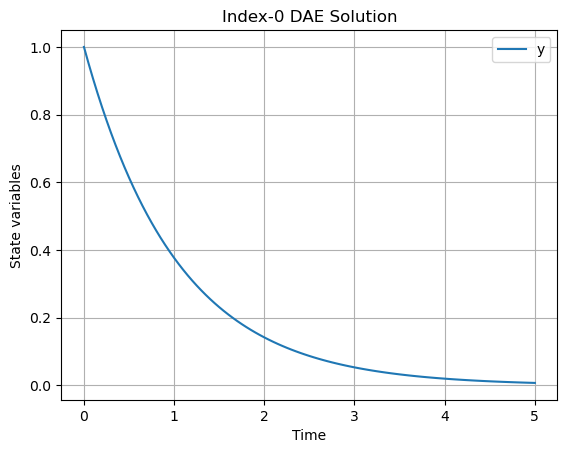

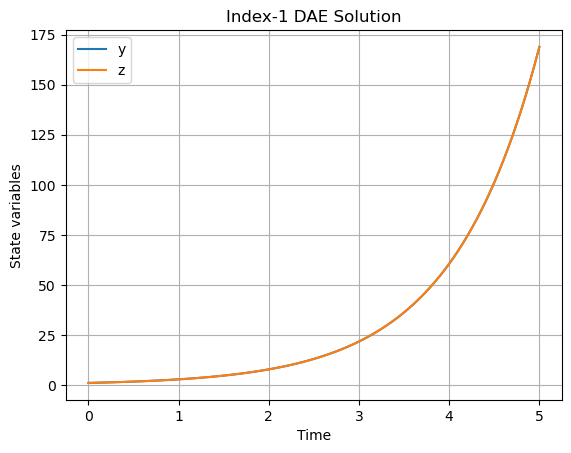

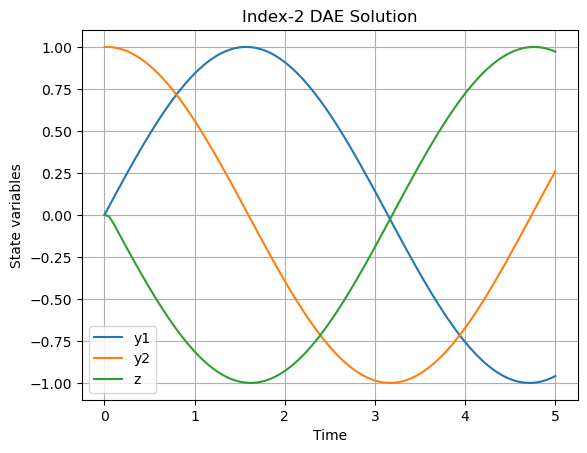

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def plot_solution(t_values, Y_values, labels, title):
    plt.figure()
    for i, label in enumerate(labels):
        plt.plot(t_values, Y_values[:, i], label=label)
    plt.xlabel('Time')
    plt.ylabel('State variables')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def solve_dae(dae_fun, y0, t0, tf, h):
    n_steps = int((tf - t0) / h) + 1
    t_values = np.linspace(t0, tf, n_steps)
    dim = len(y0)
    Y_values = np.zeros((n_steps, dim))
    Y_values[0] = y0
    y_prev = y0.copy()
    for i in range(1, n_steps):
        t_next = t_values[i]
        def res(x):
            dot = (x - y_prev) / h
            return dae_fun(dot, x, t_next)
        y_next = fsolve(res, y_prev)
        Y_values[i] = y_next
        y_prev = y_next.copy()
    return t_values, Y_values

# Index-0 DAE (equivalent to ODE: dy/dt = -y)
def dae_index0(dot_y, y, t):
    return np.array([dot_y[0] + y[0]])

y0_index0 = np.array([1.0])
t_index0, Y_index0 = solve_dae(dae_index0, y0_index0, 0.0, 5.0, 0.05)
plot_solution(t_index0, Y_index0, ['y'], 'Index-0 DAE Solution')

# Index-1 DAE (dy/dt = -y + 2z, 0 = y - z)
def dae_index1(dot_y, y, t):
    return np.array([dot_y[0] + y[0] - 2 * y[1], y[0] - y[1]])

y0_index1 = np.array([1.0, 1.0])
t_index1, Y_index1 = solve_dae(dae_index1, y0_index1, 0.0, 5.0, 0.05)
plot_solution(t_index1, Y_index1, ['y', 'z'], 'Index-1 DAE Solution')

# Index-2 DAE (dy1/dt = y2, dy2/dt = z, 0 = y1 - sin(t))
def dae_index2(dot_y, y, t):
    return np.array([dot_y[0] - y[1], dot_y[1] - y[2], y[0] - np.sin(t)])

y0_index2 = np.array([0.0, 1.0, 0.0])
t_index2, Y_index2 = solve_dae(dae_index2, y0_index2, 0.0, 5.0, 0.05)
plot_solution(t_index2, Y_index2, ['y1', 'y2', 'z'], 'Index-2 DAE Solution')

## 3 (Optional) Special topic: Coupled ODE and DAE Systems

Real-world engineering problems rarely involve isolated scalar equations; instead, they are described by systems of coupled ODEs (or DAEs), where the time derivative of each state variable depends on multiple (or all) other states. In our standard notation, this is simply the vector form we have already used:

$$\frac{d\mathbf{y}}{dt}(t) = \mathbf{f}(\mathbf{y}(t), t, \mathbf{p}),$$

where $\mathbf{y}(t) \in \mathbb{R}^m$ is the state vector and $\mathbf{f}: \mathbb{R}^m \to \mathbb{R}^m$ is vector-valued. All numerical methods discussed—explicit Euler, implicit Euler, RK, LSODA, adaptive stepping, and symplectic integrators—extend directly to this form with no conceptual changes; only the implementation treats y and the return value of f as NumPy arrays.

There are some Special considerations for simulating coupled systems, including:

- Jacobian matrix: $\mathbf{J} = \frac{\partial \mathbf{f}}{\partial \mathbf{y}}$: Providing an analytical (or approximated) Jacobian dramatically speeds up implicit methods and stiffness detection in solvers like `solve_ivp(..., jac=jac_fun)`.
- Vectorised evaluation: Implement $\mathbf{f}$ efficiently using array operations (no Python loops over states).
- Stiffness in multiple variables: The eigenvalue spectrum of $\mathbf{J}$ determines stability; widely spread eigenvalues (fast/slow modes) demand implicit or hybrid solvers.
- Consistent initialization for DAEs: Initial $\mathbf{y}_0, \mathbf{z}_0$ must satisfy all hidden constraints (differentiated algebraic equations); otherwise solvers diverge or drift.
- State-space form (especially important for control thoery later): Linear(ised) coupled systems are often written as $\dot{\mathbf{y}} = \mathbf{A} \mathbf{y} + \mathbf{B} \mathbf{u}(t)$, enabling matrix-exponential solutions for LTI cases or decoupling analysis later.


> ### Example: Coupled Linear Oscillator (State-Space Form)
> Consider two masses $m_1 = m_2 = 1$ kg connected by springs ($k_1 = k_2 = k_{12} = 1$ N/m) with light damping ($c = 0.1$ Ns/m). The second-order equations are recast as four first-order ODEs:
>
> $$\mathbf{y} = \begin{bmatrix} x_1 \\ x_2 \\ \dot{x}_1 \\ \dot{x}_2 \end{bmatrix}, \quad
\dot{\mathbf{y}} = \mathbf{A} \mathbf{y}, \quad
\mathbf{A} = \begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-(k_1+k_{12}) & k_{12} & -c & 0 \\
k_{12} & -(k_2+k_{12}) & 0 & -c
\end{bmatrix}.$$
>
> This is a lightly damped coupled system with two natural frequencies.

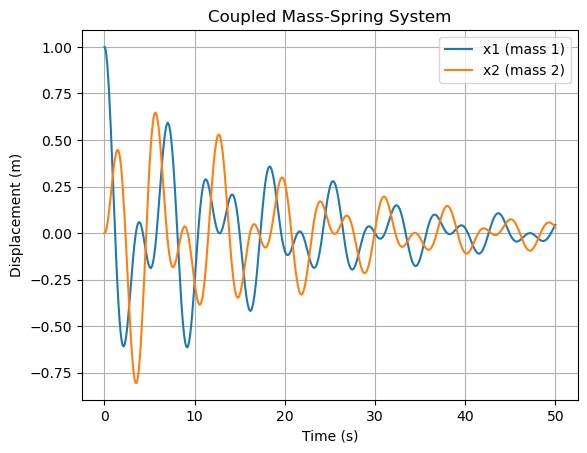

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# System matrices
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [-2, 1, -0.1, 0],
              [1, -2, 0, -0.1]])

def f(t, y):
    return A @ y  # Linear: dy/dt = A y

def jac(t, y):
    return A       # Constant Jacobian (optional but speeds up stiff solvers)

# Initial conditions: displace first mass
y0 = np.array([1.0, 0.0, 0.0, 0.0])

# Solve with LSODA (handles mild stiffness from damping)
sol = solve_ivp(f, [0, 50], y0, method='LSODA', jac=jac, rtol=1e-6)

# Plot displacements
plt.plot(sol.t, sol.y[0], label='x1 (mass 1)')
plt.plot(sol.t, sol.y[1], label='x2 (mass 2)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Coupled Mass-Spring System')
plt.legend()
plt.grid()
plt.show()

## Further reading

Original and Seminal Papers

Runge-Kutta Methods: The classical methods were developed in the late 19th and early 20th centuries. For a historical overview and citations to the originals (Runge 1895, Heun 1900, Kutta 1901), see this paper by which surveys the evolution and provides references to the primary sources:

- Butcher, J. C. (1996) "A history of Runge-Kutta methods." Applied Numerical Mathematics, 20(3), 247–260.

The modern methods (such as `RK45`) are due to Erwin Fehlberg:

- Fehlberg, Erwin (1968) Classical fifth-, sixth-, seventh-, and eighth-order Runge-Kutta formulas with stepsize control. NASA Technical Report 287. https://ntrs.nasa.gov/api/citations/19680027281/downloads/19680027281.pdf
- Fehlberg, Erwin (1969) Low-order classical Runge-Kutta formulas with stepsize control and their application to some heat transfer problems. Vol. 315. National aeronautics and space administration.

LSODA and Automatic Method Switching:

- Petzold, L. R. (1983). "Automatic Selection of Methods for Solving Stiff and Nonstiff Systems of Ordinary Differential Equations." SIAM Journal on Scientific and Statistical Computing, 4(1), 136–148.
This introduces the adaptive switching between stiff and non-stiff solvers, foundational to LSODA. See also
- Hindmarsh, A. C., & Petzold, L. R. (2005). "LSODA, Ordinary Differential Equation Solver for Stiff or Non-Stiff System." (Software documentation and description).

DAE Indices and Solution Methods:

- Petzold, L. R. (1982). "Differential/Algebraic Equations are not ODE's." SIAM Journal on Scientific and Statistical Computing, 3(3), 367–384.

This seminal paper defines the index concept and highlights why DAEs require special treatment. For ODE methods applied to DAEs, see

- Gear, C. W., & Petzold, L. R. (1984). "ODE Methods for the Solution of Differential/Algebraic Systems." SIAM Journal on Numerical Analysis, 21(4), 716–728.

Symplectic Integrators:
- Hairer, E., Lubich, C., & Wanner, G. (2003). "Geometric numerical integration illustrated by the Störmer–Verlet method." Acta Numerica, 12, 399–450.

This provides a modern introduction with historical context. For foundational work, see

- Hairer, E., Lubich, C., & Wanner, G. (2006). Geometric Numerical Integration: Structure-Preserving Algorithms for Ordinary Differential Equations (Springer), which includes original contributions from the authors.

Stiffness and Backward Differentiation Formulas (BDF):

- Hindmarsh, A. C. (1980). "LSODE and LSODI, two new initial value ordinary differential equation solvers." ACM SIGNUM Newsletter, 15(4), 10–11. This discusses early solvers for stiff systems.

